# Effect of input scaling on cost-landscape 

1. First VRP matrix 

In [47]:
distancematrix1 = [[0.0, 5.414213562373095, 25.656854249492383, 22.242640687119287, 9.414213562373096, 2.414213562373095], [5.414213562373095, 0.0, 19.65685424949238, 20.48528137423857, 7.65685424949238, 4.414213562373095], [25.656854249492383, 19.65685424949238, 0.0, 8.82842712474619, 18.82842712474619, 24.656854249492383], [22.242640687119287, 20.48528137423857, 8.82842712474619, 0.0, 23.414213562373096, 19.82842712474619], [9.414213562373096, 7.65685424949238, 18.82842712474619, 23.414213562373096, 0.0, 11.242640687119286], [2.414213562373095, 4.414213562373095, 24.656854249492383, 19.82842712474619, 11.242640687119286, 0.0]]

2. Second VRP Matrix

In [48]:
distancematrix2 = [[0.0, 85.7401153701775, 32.41421356237309, 154.42640687119302, 154.99494936611674, 193.67619023324892], [85.7401153701775, 0.0, 77.72792206135786, 143.4142135623731, 69.25483399593898, 126.68124086713172], [32.41421356237309, 77.72792206135786, 0.0, 127.08326112068514, 146.98275605729697, 181.5634918610407], [154.42640687119302, 143.4142135623731, 127.08326112068514, 0.0, 167.4142135623731, 104.41421356237309], [154.99494936611674, 69.25483399593898, 146.98275605729697, 167.4142135623731, 0.0, 71.48528137423855], [193.67619023324892, 126.68124086713172, 181.5634918610407, 104.41421356237309, 71.48528137423855, 0.0]]

## Function to get landscape for VRP with distance_matrix 

In [2]:
from typing import List

from openqaoa.problems import VRP
from openqaoa import QAOA, QAOABenchmark
from openqaoa.backends import create_device


def run_qaoa_benchmark(distance_matrix: List[List[float]], n_vehicles: int, device_location: str = 'local', device_name: str = 'qiskit.qasm_simulator', parameter_type: str = 'standard', initialization_type: str = 'rand', scaled: bool = True, mixer_hamiltonian: str = 'x', n_shots: int = 85) -> None:
    """
    Run a QAOA benchmark for the Vehicle Routing Problem (VRP) based on the provided parameters.

    Parameters:
    - distance_matrix (List[List[float]]): The matrix representing the distances between the locations.
    - n_vehicles (int): The number of vehicles available for the VRP.
    - device_location (str, optional): The location of the simulator. Defaults to 'local'.
    - device_name (str, optional): The name of the simulator. Defaults to 'qiskit.qasm_simulator'.
    - parameter_type (str, optional): The type of the parameter. Defaults to 'standard'.
    - initialization_type (str, optional): The initialization type. Defaults to 'rand'.
    - scaled (bool, optional): The scaling of the distance_matrix. Defaults to 'True'.
    - mixer_hamiltonian (str, optional): The mixer Hamiltonian type. Defaults to 'x'.
    - n_shots (int, optional): The number of shots for the device. Defaults to 85.

    Returns:
    - None: The function does not return any value. It runs the benchmark and displays the result as a plot.
    """

    if scaled:
        num_nodes = len(distance_matrix)

        # Initialize a square matrix for scaled distances
        distance_list = [[0.0] * num_nodes for _ in range(num_nodes)]

        # Find the maximum distance in the original matrix
        max_distance = max(max(row) for row in distance_matrix)

        # Scale the distance matrix
        for i in range(num_nodes):
            for j in range(i, num_nodes):
                distance_list[i][j] = distance_list[j][i] = distance_matrix[i][j] / max_distance

        # Create VRP instance from the scaled distance matrix
        vrp = VRP.from_distance_matrix(matrix=distance_list, n_vehicles=n_vehicles)
    else:
        # Create VRP instance from the original distance matrix
        vrp = VRP.from_distance_matrix(matrix=distance_matrix, n_vehicles=n_vehicles)

    try:
        # Create QAOA instance
        qubo = vrp.qubo
        q = QAOA()

        # Set device
        qiskit_device = create_device(location=device_location, name=device_name)
        q.set_device(qiskit_device)

        # Set circuit properties
        q.set_circuit_properties(p=1, param_type=parameter_type, init_type=initialization_type, mixer_hamiltonian=mixer_hamiltonian)

        # Set backend properties (already set by default)
        q.set_backend_properties(prepend_state=None, append_state=None, n_shots=n_shots)

        # Create QAOABenchmark instance
        q.compile(qubo)
        benchmark = QAOABenchmark(q)

        # Run the benchmark
        benchmark.run(n_points_axis=2**5+1, ranges=[(0, 3.14/2), (0, 3.14/2)], plot=True, plot_every=100)

    except Exception as error:
        print(f"Error: {error}")




Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


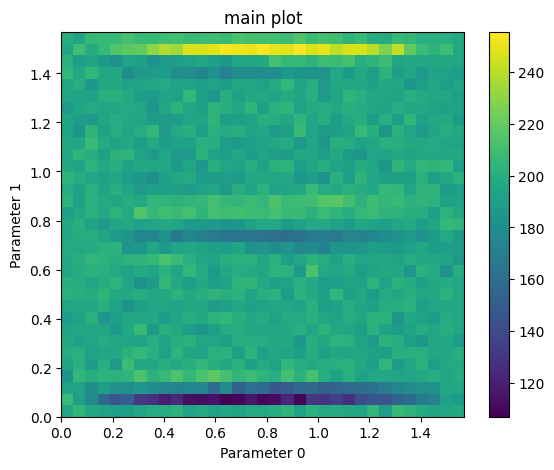

 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 05:30:00, it will be finished at 20:20:39. pected remaining time to complete: 05:30:18, it will be finished at 20:20:41. Expected remaining time to complete: 05:30:18, it will be finished at 20:20:40. Expected remaining time to complete: 05:30:16, it will be finished at 20:20:39. Expected remaining time to complete: 05:30:15, it will be finished at 20:20:39. Expected remaining time to complete: 05:30:12, it will be finished at 20:20:39. Expected remaining time to complete: 05:30:03, it will be finished at 20:20:39.
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


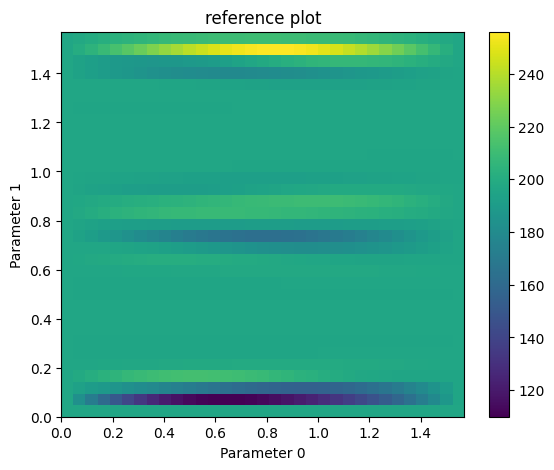

In [45]:
run_qaoa_benchmark(
    distance_matrix=distancematrix1,
    n_vehicles=3,
    device_location='local',
    device_name='qiskit.qasm_simulator',
    parameter_type='standard',
    initialization_type='rand',
    scaled=False,  # Set scaled to False
    mixer_hamiltonian='x',
    n_shots=85
)


Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


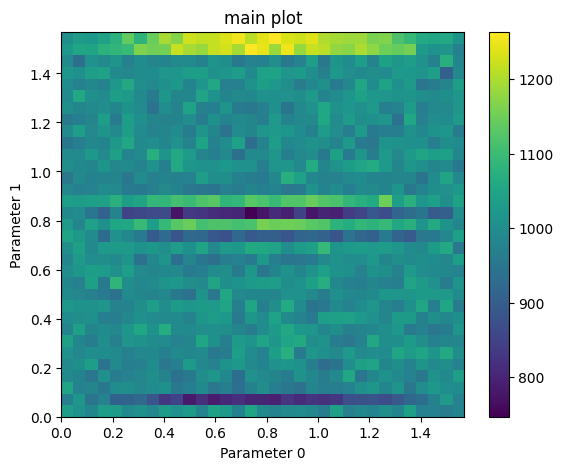

 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 05:30:00, it will be finished at 20:23:09. pected remaining time to complete: 05:30:17, it will be finished at 20:23:09. Expected remaining time to complete: 05:30:12, it will be finished at 20:23:10. Expected remaining time to complete: 05:30:04, it will be finished at 20:23:09. Expected remaining time to complete: 05:30:00, it will be finished at 20:23:09.
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


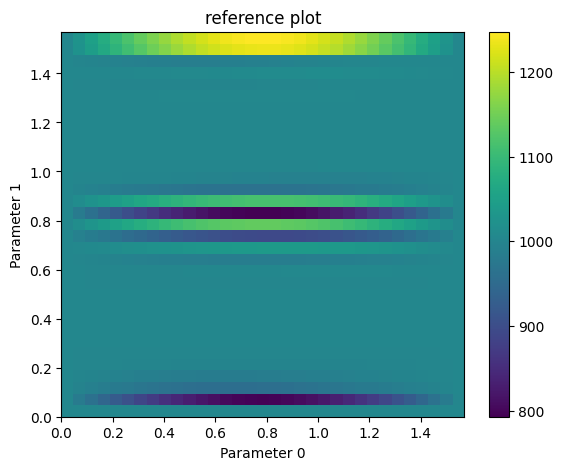

In [49]:
run_qaoa_benchmark(
    distance_matrix=distancematrix2,
    n_vehicles=3,
    device_location='local',
    device_name='qiskit.qasm_simulator',
    parameter_type='standard',
    initialization_type='rand',
    scaled=False, 
    mixer_hamiltonian='x',
    n_shots=85
)    

## Let's do the scaling 

Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


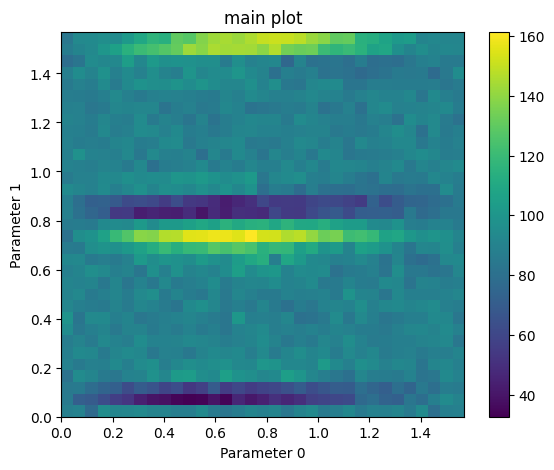

 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 05:30:00, it will be finished at 20:18:26. 
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


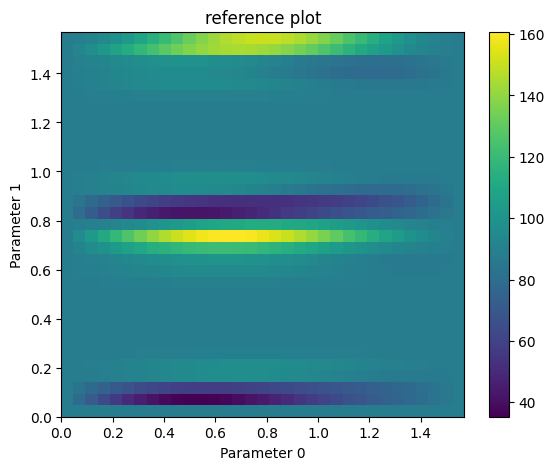

In [43]:
run_qaoa_benchmark(
    distance_matrix=distancematrix1,
    n_vehicles=3,
    device_location='local',
    device_name='qiskit.qasm_simulator',
    parameter_type='standard',
    initialization_type='rand',
    scaled=True,
    mixer_hamiltonian='x',
    n_shots=85
) 

Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


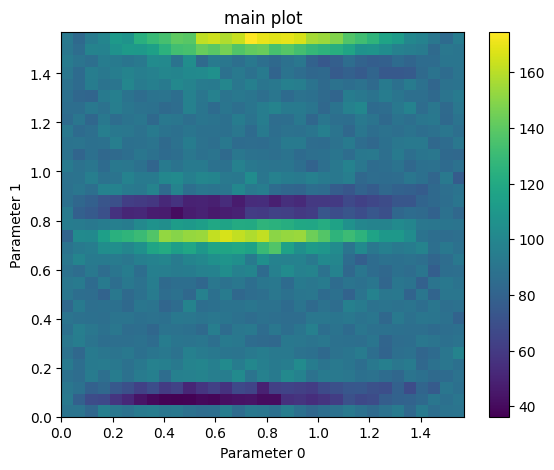

 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 05:30:00, it will be finished at 20:28:14. 
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


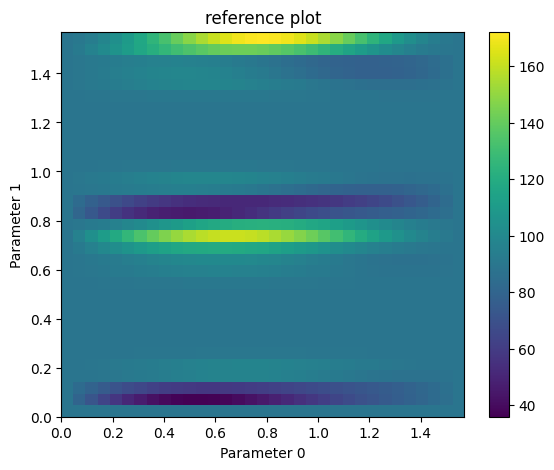

In [56]:
run_qaoa_benchmark(
    distance_matrix=distancematrix2,
    n_vehicles=3,
    device_location='local',
    device_name='qiskit.qasm_simulator',
    parameter_type='standard',
    initialization_type='rand',
    scaled=True, 
    mixer_hamiltonian='x',
    n_shots=85
)
